In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [4]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episo

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

In [7]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()


Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [8]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [9]:
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'][:5]

1     True
2    False
3     True
4     True
5     True
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: bool

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'][:5]

1     True
2      NaN
3    False
4     True
5     True
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: object

In [31]:
#convert each column to a boolean an rename column (like seen_1)
#star_wars.rename(index=str, columns={'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1', 'Unnamed: 4':'seen_2', 'Unnamed: 5':'seen_3','Unnamed: 6':'seen_4','Unnamed: 7':'seen_5','Unnamed: 8':'seen_6'})

test = star_wars.columns[3:9].tolist()

new_names_seen = ['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5','seen_6']

for i, item in enumerate(test):
    star_wars.rename(index=str, columns={test[i]:new_names_seen[i]}, inplace=True)
    
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

In [32]:
movie_names = star_wars.iloc[0:1, 3:9].values.tolist()

movie_names = [val for sublist in movie_names for val in sublist]

movie_names

[True, True, True, True, True, True]

In [33]:
i = 0

for movie in movie_names:
    
    saw_movie = {
    movie: True,
    np.nan: False
    }

    star_wars[new_names[i]] = star_wars[new_names_seen[i]].map(saw_movie)
    
    i += 1


In [14]:
star_wars.iloc[:3,3:9]

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False


In [34]:
test = star_wars.columns[9:15].tolist()

new_names_rank = ['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5','rank_6']

for i, item in enumerate(test):
    star_wars.rename(index=str, columns={test[i]:new_names_rank[i]}, inplace=True)
    
star_wars.columns[9:15]

Index(['rank_1', 'rank_2', 'rank_3', 'rank_4', 'rank_5', 'rank_6'], dtype='object')

In [16]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [17]:
star_wars.iloc[:3,9:15]

,rank_1,rank_2,rank_3,rank_4,rank_5,rank_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0


In [18]:
mean_rank = star_wars.iloc[:,9:15].mean()
mean_rank

rank_1    3.732934
rank_2    4.087321
rank_3    4.341317
rank_4    3.272727
rank_5    2.513158
rank_6    3.047847
dtype: float64

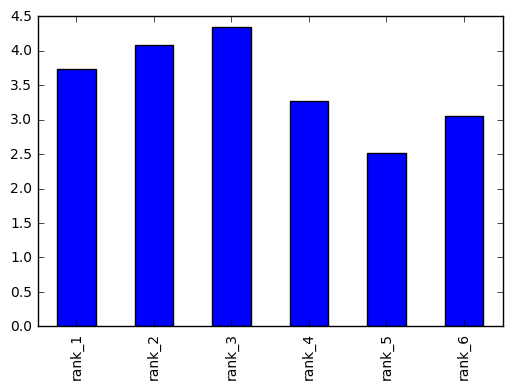

In [19]:
mean_rank.plot.bar()

So far survey columns about people seeing star wars movies and how they ranked and have been cleaned up for analysis. The columns 3:15 were turned into true, false or nan values in order clean them up. Mapping functions were used mainly to achieve this.

In the chart above, the average ranking of six Star Wars movies is displayed. A lower value is deemed a better ranking. The column "rank_5" refers to the movie the *Empire Strikes Back*. It got the best rank at roughly 2.5. The column "rank_3" refers to the movie *Star Wars: Episode III – Revenge of the Sith*. It got the worst ranking of roughly 4.34. 

Overall it appears earlier Star Wars movies had better ranking than the more recent Star Wars Movies. 

In [20]:
sum_rank = star_wars.iloc[:,3:9].sum()
sum_rank

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

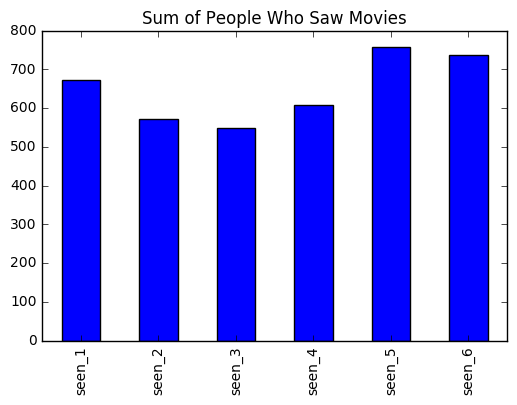

In [21]:
sum_rank.plot.bar(title="Sum of People Who Saw Movies")

In the bar chart above, sum of people who Star Wars movies is displayed. The bar chart visually communicates that more people saw earlier movies released in the the theatre (seen_4, seen_5, seen_6) than more recent Star Wars movies released in the theatre.  

This could help explain why the earlier movies got a higher ranking above. More people saw the earlier Star Wars movies, therefore they were more likely to rate them higher than newer Star Wars movies.

Also another reason is if more people see a movie, the more likley the movie will receive a higher rating. There appears to be correlation between ranking of movie and sum of people of who saw the movie. 

In [22]:
fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
non_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [49]:
mean_rank = fan.iloc[:,9:15].mean()
mean_fan_rank


rank_1    4.141304
rank_2    4.342391
rank_3    4.417423
rank_4    2.932971
rank_5    2.333333
rank_6    2.829710
dtype: float64

In [54]:
mean_non_fan_rank = non_fan.iloc[:,9:15].mean()
mean_non_fan_rank


rank_1    2.936396
rank_2    3.591549
rank_3    4.193662
rank_4    3.933099
rank_5    2.862676
rank_6    3.471831
dtype: float64

In [81]:
df1 = pd.DataFrame(mean_fan_rank)
df2 = pd.DataFrame(mean_non_fan_rank)

df1.join(df2)



ValueError: columns overlap but no suffix specified: RangeIndex(start=0, stop=1, step=1)

In [41]:
import seaborn as sns

